In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix


In [2]:
Japan = pd.read_csv('Cleaned Data/Japan.csv')
China = pd.read_csv('Cleaned Data/China.csv')
Korea = pd.read_csv('Cleaned Data/Korea.csv')
Singapore = pd.read_csv('Cleaned Data/Singapore.CSV')
Malaysia = pd.read_csv('Cleaned Data/Malaysia.CSV')
Highincome  = pd.read_csv('Cleaned Data/Highincome_DF.CSV')
UpperMidincome = pd.read_csv('Cleaned Data/UpperMidincome_DF.CSV')
#Japan.set_index('Year', inplace = True)
China.set_index('Year', inplace = True) 
Korea.set_index('Year', inplace = True)
Singapore.set_index('Year', inplace = True)
Malaysia.set_index('Year', inplace = True) 
Highincome.set_index('Year', inplace = True)
UpperMidincome.set_index('Year', inplace = True) 
Japan.dropna(inplace = True)
China.dropna(inplace = True)
Korea.dropna(inplace = True)
Singapore.dropna(inplace = True)
Singapore.dropna(inplace = True)
Malaysia.dropna(inplace = True)

In [3]:
features =['14 Under', '15 to 64', '64 Above', 'Female(%)']
def Test_Train_STD(x):
    y = x['Work Population(%)'].pct_change()
    X = x[features].pct_change()
    y.dropna(inplace= True)
    X.dropna(inplace=True)
    y_train =  y[:50]
    y_test = y[50:]
    X_train =  X[:50]
    X_test =  X[50:]
    return (X_train, X_test, y_train, y_test)

In [4]:
from sklearn.preprocessing import MinMaxScaler
def OLS_Reg(x):
    X_train, X_test, y_train, y_test = Test_Train_STD(x)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    result = sm.OLS(y_train, X_train).fit()
    return(result.summary())
print('Japan Summary:', OLS_Reg(Japan))
print('China Summary:', OLS_Reg(China))

Japan Summary:                                  OLS Regression Results                                
Dep. Variable:     Work Population(%)   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              3030.
Date:                Tue, 12 Jul 2022   Prob (F-statistic):                    4.59e-55
Time:                        18:28:53   Log-Likelihood:                          275.86
No. Observations:                  50   AIC:                                     -543.7
Df Residuals:                      46   BIC:                                     -536.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

Based on this, x1, which is the fertility rate, seems to have bigger signficance for China. Moreover, having more number of younger population seem to have positive coefficent than aging population.

0.4782790871006778
-98.18157148948382
-12.25925536883853


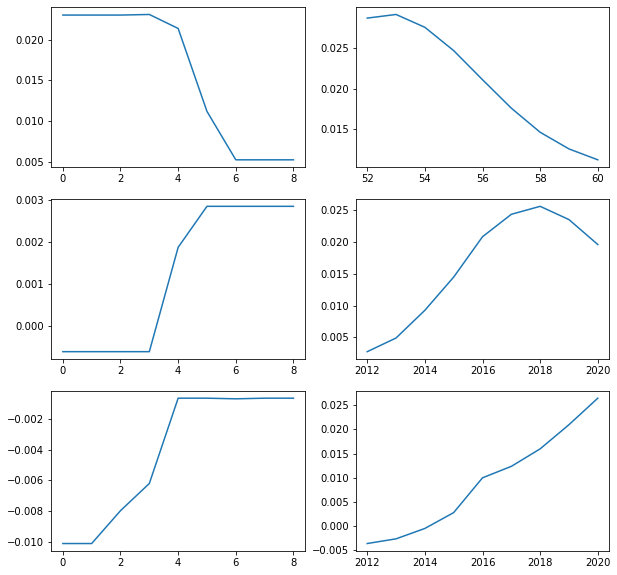

In [5]:
from sklearn.neighbors import KNeighborsRegressor
def KNNR(x):
        X_train, X_test, y_train, y_test = Test_Train_STD(x)
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train_scale = scaler.transform(X_train)
        X_test_scale = scaler.transform(X_test)
        knn = KNeighborsRegressor(5)
        knn.fit(X_train_scale, y_train)
        prediction = knn.predict(X_test_scale)
        return(prediction, y_test, r2_score(prediction, y_test))
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].plot(KNNR(Japan)[0])
ax[0,1].plot(KNNR(Japan)[1])
ax[1,0].plot(KNNR(China)[0])
ax[1,1].plot(KNNR(China)[1])
ax[2,0].plot(KNNR(Korea)[0])
ax[2,1].plot(KNNR(Korea)[1])
print(KNNR(Japan)[2])
print(KNNR(China)[2])
print(KNNR(Korea)[2])


In [6]:
from sklearn.neighbors import KNeighborsRegressor
empty = []
def KNNR(i, x):
        X_train, X_test, y_train, y_test = Test_Train_STD(x)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scale = scaler.transform(X_train)
        X_test_scale = scaler.transform(X_test)
        knn = KNeighborsRegressor(i)
        knn.fit(X_train_scale, y_train)
        prediction = knn.predict(X_test_scale)
        return(r2_score(prediction, y_test))
for i in range(1,30):
    empty.append(KNNR(i, Japan))
empty

[0.5176556391128013,
 0.6737239281382691,
 0.6198839948874715,
 0.6521755423964515,
 0.5451066318841393,
 0.46846635981236295,
 0.34006534079170125,
 0.1911822630690735,
 -0.05039219443104681,
 -0.3072851454990666,
 -0.5887982019712625,
 -0.9684493863716339,
 -1.6381813879076965,
 -2.720984210571224,
 -3.584310269683934,
 -4.516550946470683,
 -6.031926371313856,
 -10.671117753936214,
 -15.01988458082285,
 -27.176032260877825,
 -27.039574782804493,
 -24.872955338766534,
 -31.620978099496696,
 -43.95875066510285,
 -47.42051957422445,
 -40.62503090638719,
 -57.62053032347879,
 -44.90780438955161,
 -43.95872746418456]

Japan: 0.588702587827405
China: -43.32107039493179
Korea: -9.44278083393144


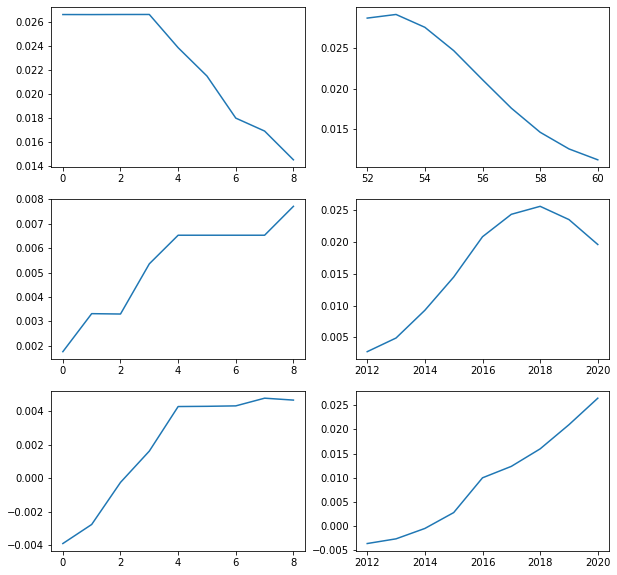

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
def Gradient(x):
    X_train, X_test, y_train, y_test = Test_Train_STD(x)
    reg =GradientBoostingRegressor(random_state = 42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.transform(X_train)
    X_test_scale = scaler.transform(X_test)
    reg.fit(X_train_scale, y_train)
    prediction = reg.predict(X_test_scale)
    return(prediction, y_test, r2_score(prediction, y_test))
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].plot(Gradient(Japan)[0])
ax[0,1].plot(Gradient(Japan)[1])
ax[1,0].plot(Gradient(China)[0])
ax[1,1].plot(Gradient(China)[1])
ax[2,0].plot(Gradient(Korea)[0])
ax[2,1].plot(Gradient(Korea)[1])
print('Japan:',Gradient(Japan)[2])
print('China:',Gradient(China)[2])
print('Korea:',Gradient(Korea)[2])

Japan: -0.5122576152625766
China: -0.9310388030477186
China: -3.1664503883782844


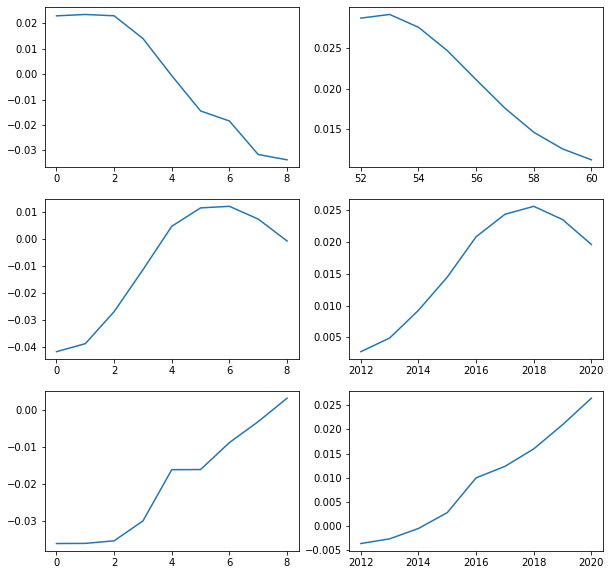

In [8]:
from sklearn.ensemble import RandomForestRegressor
def RandomForest(x):
    (X_train, X_test, y_train, y_test) = Test_Train_STD(x)
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.fit_transform(X_test)
    regr = RandomForestRegressor(100,max_depth = 3, random_state=42)
    regr.fit(X_train_scale, y_train)
    prediction = regr.predict(X_test_scale)
    return(prediction, y_test, r2_score(prediction, y_test))
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].plot(RandomForest(Japan)[0])
ax[0,1].plot(RandomForest(Japan)[1])
ax[1,0].plot(RandomForest(China)[0])
ax[1,1].plot(RandomForest(China)[1])
ax[2,0].plot(RandomForest(Korea)[0])
ax[2,1].plot(RandomForest(Korea)[1])
print('Japan:',RandomForest(Japan)[2])
print('China:',RandomForest(China)[2])
print('China:',RandomForest(Korea)[2])


In [9]:
from sklearn.ensemble import RandomForestRegressor
empty = []
def RandomForest(i,x):
    (X_train, X_test, y_train, y_test) = Test_Train_STD(x)
    scaler = Normalizer()
    scaler.fit(X_train)
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.fit_transform(X_test)
    regr = RandomForestRegressor(i, random_state =42)
    regr.fit(X_train_scale, y_train)
    prediction = regr.predict(X_test_scale)
    return( r2_score(prediction, y_test))
for i in range(1,20):
    empty.append(RandomForest(i,Japan))
empty 

[-6.540492628681054,
 -19.06429512489955,
 -10.23731076054095,
 -22.79767790200924,
 -24.489397094026273,
 -1.4907864953045493,
 -2.63291089717792,
 -3.9826237609519675,
 -2.677883450584713,
 -3.061610681453117,
 -3.7118409273644746,
 -4.302668357308097,
 -4.887918693350909,
 -6.019935064401099,
 -6.127883245149569,
 -7.476806937189567,
 -8.948960055992439,
 -10.544342601558167,
 -4.6653446475788725]

summary:                               ARMA Model Results                              
Dep. Variable:     Work Population(%)   No. Observations:                   50
Model:                     ARMA(1, 0)   Log Likelihood                 201.895
Method:                       css-mle   S.D. of innovations              0.004
Date:                Tue, 12 Jul 2022   AIC                           -397.790
Time:                        18:28:56   BIC                           -392.054
Sample:                             0   HQIC                          -395.606
                                                                              
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0031      0.023     -0.132      0.895      -0.049       0.043
ar.L1.Work Population(%)     0.9880      0.016     63.043      0.000       0.957

C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

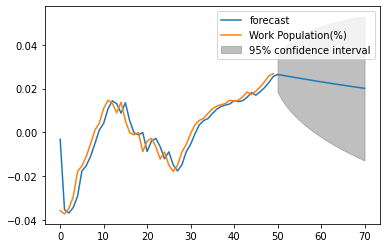

In [10]:
X_train, X_test, y_train, y_test = Test_Train_STD(Japan)
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(y_train, order=(1,0))
res = mod.fit()
print("summary:",res.summary())
res.plot_predict(start=0, end=70)
plt.show()

C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

summary:                               ARMA Model Results                              
Dep. Variable:     Work Population(%)   No. Observations:                   50
Model:                     ARMA(1, 0)   Log Likelihood                 170.612
Method:                       css-mle   S.D. of innovations              0.008
Date:                Tue, 12 Jul 2022   AIC                           -335.223
Time:                        18:28:56   BIC                           -329.487
Sample:                             0   HQIC                          -333.039
                                                                              
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0092      0.009     -1.031      0.302      -0.027       0.008
ar.L1.Work Population(%)     0.8860      0.066     13.333      0.000       0.756

C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


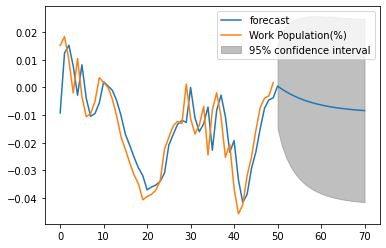

In [11]:
X_train, X_test, y_train, y_test = Test_Train_STD(China)
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(y_train, order=(1,0))
res = mod.fit()

print("summary:",res.summary())
res.plot_predict(start=0, end=70)
plt.show()

[ 0. -0.  0.  0.]


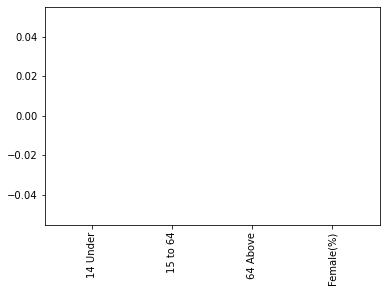

In [12]:
X_train, X_test, y_train, y_test = Test_Train_STD(Japan)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.1)
lasso.fit(X_train, y_train)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(X_train.columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

[ 0. -0. -0.  0.]


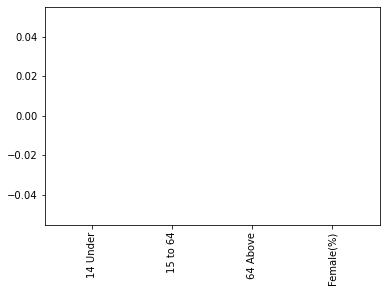

In [13]:
X_train, X_test, y_train, y_test = Test_Train_STD(China)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.1)
lasso.fit(X_train, y_train)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(X_train.columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

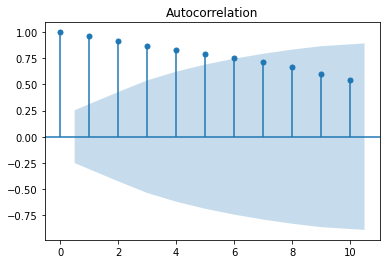

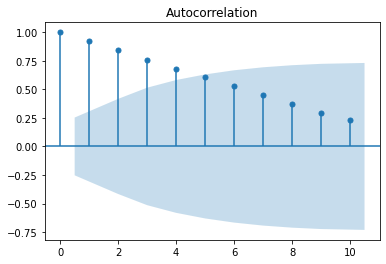

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Japan['GDP Per Capita'] ,lags=10)
plot_acf(China['GDP Per Capita'] ,lags=10)
plt.show()

In [15]:
features = [ '14 Under', '64 Above', 'Life expectancy at birth', 'Birth rate','Work Population(%)']
def Train(x):
    std = x['GDP Growth'].std()
    mean = x['GDP Growth'].mean()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    trimmedDF = x[(x['GDP Growth'] < upper) & (x['GDP Growth']> lower)]
    y_train =  trimmedDF['GDP Growth'][:40]
    X_train =  trimmedDF[features][:40]
    return (X_train, y_train)
def Test(x):
    std = x['GDP Growth'].std()
    mean = x['GDP Growth'].mean()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    trimmedDF = x[(x['GDP Growth'] < upper) & (x['GDP Growth']> lower)]
    y_test = trimmedDF['GDP Growth'][25:]
    X_test =  trimmedDF[features][25:]
    return (X_test, y_test)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
empty = []
def KNNR(i, x,y):
        X_train, y_train = Train(x)
        X_test, y_test = Test(y)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scale = scaler.transform(X_train)
        X_test_scale = scaler.transform(X_test)
        knn = KNeighborsRegressor(i)
        knn.fit(X_train_scale, y_train)
        prediction = knn.predict(X_test_scale)
        return(r2_score(prediction, y_test))
for i in range(1,30):
    empty.append(KNNR(i, Japan, China))

In [17]:
from sklearn.ensemble import RandomForestRegressor
empty = []
def RandomForest(i,x, y):
    X_train, y_train = Train(x)
    X_test, y_test = Test(y)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.fit_transform(X_test)
    regr = RandomForestRegressor(i, random_state =42)
    regr.fit(X_train_scale, y_train)
    prediction = regr.predict(X_test_scale)
    return( r2_score(prediction, y_test))
for i in range(1,20):
    empty.append(RandomForest(i,Japan, China))
empty 

[-1.5642644773882983,
 -2.019595374520311,
 -1.885477962319258,
 -1.8626427288226721,
 -1.8506502178165323,
 -1.989859942033366,
 -1.8832028321921888,
 -1.9305323919790252,
 -1.6841227697278374,
 -1.775557028132691,
 -2.0571893574047624,
 -2.0507107080808464,
 -2.2701991146873137,
 -2.3529485807215136,
 -2.409194060263164,
 -2.3974052014953515,
 -2.3652817664974726,
 -2.3036797765915122,
 -2.3175621416613486]

In [18]:
Japan.columns

Index(['Year', 'GDP', 'GDP Growth', 'GDP Per Capita', 'GDP Per Capita Growth',
       '14 Under', '15 to 64', '64 Above', 'Female(%)', 'Total pop',
       'Life expectancy at birth', 'Fertility rate, total (births per woman)',
       'Death rate', 'Birth rate', 'Work Population(%)'],
      dtype='object')

In [19]:
X_train, X_test, y_train, y_test = Test_Train_STD(Japan)

In [20]:
len(X_train)

50

In [21]:
len(y_train)

50

In [22]:
len(X_test)

9

In [23]:
len(y_test)

9

In [24]:
X_train

,14 Under,64 Above,Life expectancy at birth,Birth rate,Work Population(%)
2,-0.031646,0.018776,0.004170,0.005882,-0.035662
3,-0.033624,0.018631,0.015499,0.017544,-0.037178
4,-0.032350,0.018485,0.006810,0.022989,-0.034642
5,-0.028721,0.018443,0.000991,0.050562,-0.029402
6,-0.020467,0.022832,0.011177,-0.262032,-0.017747
7,-0.018838,0.022947,0.004085,0.405797,-0.015299
8,-0.015378,0.022536,0.004695,-0.036082,-0.010975
9,-0.010223,0.021430,0.003178,-0.010695,-0.005073
10,-0.004644,0.020179,0.001552,0.010811,0.001099
11,-0.003271,0.024688,0.012963,0.021390,0.004254


In [25]:
y_test

52    0.028617
53    0.029062
54    0.027492
55    0.024639
56    0.021081
57    0.017599
58    0.014651
59    0.012613
60    0.011280
Name: Work Population(%), dtype: float64

In [26]:
x = Japan.drop(columns ='Year')

In [27]:
x

,GDP,GDP Growth,GDP Per Capita,GDP Per Capita Growth,14 Under,15 to 64,64 Above,Female(%),Total pop,Life expectancy at birth,"Fertility rate, total (births per woman)",Death rate,Birth rate,Work Population(%)
1,5.350862e+10,12.043536,568.907743,11.044073,29.409036,64.861841,5.729123,50.774954,94055000.0,68.310000,2.050,7.40,17.00,54.173853
2,6.072302e+10,8.908973,639.640785,7.901714,28.478359,65.684948,5.836693,50.774908,94933000.0,68.594878,2.010,7.50,17.10,52.241880
3,6.949813e+10,8.473642,724.693762,7.379857,27.520804,66.533759,5.945438,50.775146,95900000.0,69.658049,2.020,7.00,17.40,50.299641
4,8.174901e+10,11.676708,843.616879,10.520792,26.630508,67.314153,6.055339,50.773674,96903000.0,70.132439,2.050,6.90,17.80,48.557168
5,9.095028e+10,5.819708,928.518849,4.686450,25.865647,67.967334,6.167019,50.769168,97952000.0,70.201951,2.139,7.10,18.70,47.129502
6,1.056281e+11,10.638562,1068.558440,9.632360,25.336248,68.355928,6.307824,50.761247,98851000.0,70.986585,1.580,6.80,13.80,46.293090
7,1.237819e+11,11.082142,1239.318377,9.938834,24.858973,68.688458,6.452569,50.750414,99879000.0,71.276585,2.020,6.70,19.40,45.584867
8,1.466011e+11,12.882468,1451.337703,11.617428,24.476704,68.925309,6.597987,50.737393,101011000.0,71.611220,2.130,6.80,18.70,45.084587
9,1.722042e+11,12.477895,1684.659403,11.148657,24.226481,69.034137,6.739382,50.723280,102219000.0,71.838780,2.130,6.80,18.50,44.855869
10,2.126092e+11,2.512953,2056.122046,1.339145,24.113974,69.010653,6.875374,50.708964,103403000.0,71.950244,2.135,6.90,18.70,44.905165


In [28]:
Japan.pct_change()

,Year,GDP,GDP Growth,GDP Per Capita,GDP Per Capita Growth,14 Under,15 to 64,64 Above,Female(%),Total pop,Life expectancy at birth,"Fertility rate, total (births per woman)",Death rate,Birth rate,Work Population(%)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000510,0.134827,-0.260269,0.124331,-0.284529,-0.031646,0.012690,0.018776,-9.089127e-07,0.009335,0.004170,-0.019512,0.013514,0.005882,-0.035662
3,0.000510,0.144510,-0.048864,0.132970,-0.066044,-0.033624,0.012922,0.018631,4.696217e-06,0.010186,0.015499,0.004975,-0.066667,0.017544,-0.037178
4,0.000509,0.176276,0.378003,0.164101,0.425609,-0.032350,0.011729,0.018485,-2.899805e-05,0.010459,0.006810,0.014851,-0.014286,0.022989,-0.034642
5,0.000509,0.112555,-0.501597,0.100640,-0.554553,-0.028721,0.009703,0.018443,-8.875190e-05,0.010825,0.000991,0.043415,0.028986,0.050562,-0.029402
6,0.000509,0.161383,0.828023,0.150820,1.055364,-0.020467,0.005717,0.022832,-1.560051e-04,0.009178,0.011177,-0.261337,-0.042254,-0.262032,-0.017747
7,0.000509,0.171865,0.041696,0.159804,0.031817,-0.018838,0.004865,0.022947,-2.134187e-04,0.010399,0.004085,0.278481,-0.014706,0.405797,-0.015299
8,0.000508,0.184350,0.162453,0.171077,0.168892,-0.015378,0.003448,0.022536,-2.565735e-04,0.011334,0.004695,0.054455,0.014925,-0.036082,-0.010975
9,0.000508,0.174645,-0.031405,0.160763,-0.040351,-0.010223,0.001579,0.021430,-2.781550e-04,0.011959,0.003178,0.000000,0.000000,-0.010695,-0.005073
10,0.000508,0.234634,-0.798608,0.220497,-0.879883,-0.004644,-0.000340,0.020179,-2.822292e-04,0.011583,0.001552,0.002347,0.014706,0.010811,0.001099
